In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

# ipywidgets used to interact with graphs
from ipywidgets import interact

# Increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline

In [2]:
housing = pd.read_csv('./data/housing.csv')

# Replace NaN values with mean value of total bedrooms column
housing['total_bedrooms'].fillna(value=538, inplace=True)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. It contains the median house prices for California districts ('median_house_value' column).

The other columns are self-explanatory:
* **longitude and latitude** are measures of how far west and north the houses are
* **housing median age** is the median age of a house within a block (a lower number is a newer building)
* **total rooms** is the total number of rooms within a block
* **total bedrooms** is the total number of bedrooms within a block
* **population** is the number of people living within a block
* **households** is the number of households within a block
* **median income** is the median income value for households within a block (measured in 10,000 dollars)
* **median house value** is the median house price for homes within a block (*target variable*)
* **ocean proximity** is the proximity of house to the sea

In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.871851,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266593,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


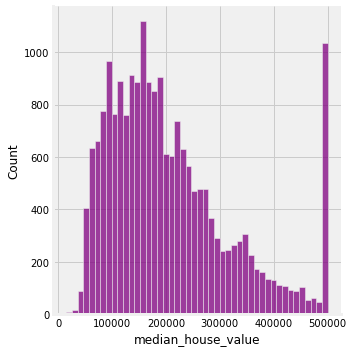

In [4]:
# Left-skewed distribution for median house value with some outliers (mean is less than median)
sns.displot(housing.median_house_value, color='purple')

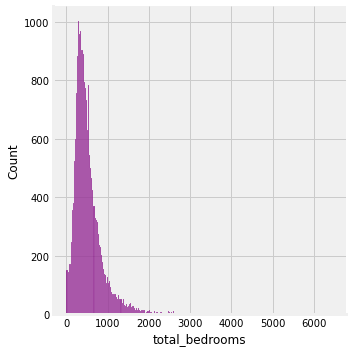

In [5]:
# Distribution plot for total number of bedrooms per block - also left-skewed
sns.displot(housing.total_bedrooms, color='purple')

In [6]:
# Convert ocean proximity to dummy columns
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
dummy_housing = pd.get_dummies(data=housing, columns=['ocean_proximity'])

dummy_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


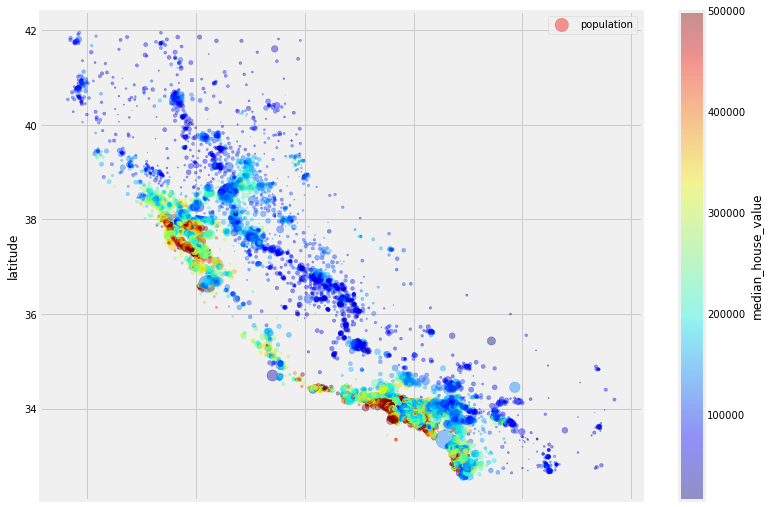

In [12]:
# What to do about longitude and latitude? Longitude doesn't seem to have much impact...
# (bimodal distribution for both longitude and latitude)

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing.population / 100, label='population', figsize=(12,9), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.xlabel("longitude")
plt.show();


Housing prices are very much related to location, i.e. close to the sea the higher the price.
Prices are also related to population density (larger circles indicate larger population) so the closer to amenities, the more expensive the property.

In [13]:
corr_matrix = dummy_housing.corr()

In [14]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049454
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

In [15]:
# 'households' and 'total_bedrooms' highly correlated and should be removed
# Remove variables ['longitude', 'total_bedrooms', 'households', 'ocean_proximity_ISLAND'] 

X = dummy_housing.drop(['longitude', 'total_bedrooms', 'households', 'ocean_proximity_ISLAND', 'median_house_value'], axis=1)
y = dummy_housing.median_house_value

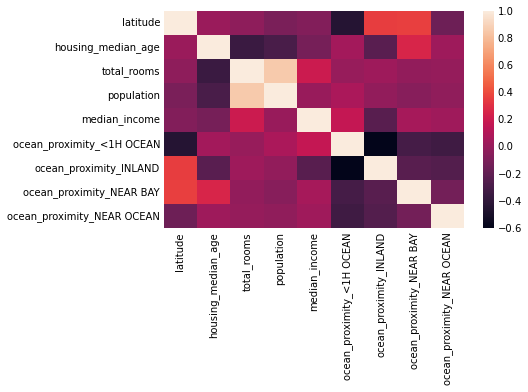

In [16]:
sns.heatmap(X.corr());

In [17]:
# Total rooms and population still show high correlation

In [18]:
# Import machine-learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Use StandardScaler on feature variable

In [19]:
X.head()

,latitude,housing_median_age,total_rooms,population,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,37.88,41.0,880.0,322.0,8.3252,0,0,1,0
1,37.86,21.0,7099.0,2401.0,8.3014,0,0,1,0
2,37.85,52.0,1467.0,496.0,7.2574,0,0,1,0
3,37.85,52.0,1274.0,558.0,5.6431,0,0,1,0
4,37.85,52.0,1627.0,565.0,3.8462,0,0,1,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
# Standardize feature matrices (centering data around mean equals zero)
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# MLP Regressor

In [ ]:
# Tune MLP model for high-level parameters using RandomizedSearchCV (WARNING! Extremely slow...)
param_distribs = {'activation':['identity', 'tanh', 'relu'], 
                  'solver':['lbfgs', 'sgd', 'adam'], 
                  'alpha':np.arange(0.0001, 100), 
                  'learning_rate':['constant', 'invscaling', 'adaptive']}

mlp = MLPRegressor(hidden_layer_sizes=(2,), max_iter=500000, random_state=42)
random_mlp = RandomizedSearchCV(mlp, param_distribs, n_iter=10, cv=3)
random_mlp.fit(X_train_ss, y_train)

print("Best parameter values:", random_mlp.best_params_)
print("With best R2 score of:", np.round(random_mlp.best_score_, 2))

C:\Users\shmel\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\shmel\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\shmel\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\shmel\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\shmel\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shmel\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = 

In [18]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(2,), activation='relu', solver='lbfgs', alpha=67.0001, learning_rate='invscaling', max_iter=100000, random_state=42)

mlp_reg.fit(X_train_ss, y_train)

y_pred = mlp_reg.predict(X_test_ss)

In [19]:
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred), 2))  
#print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred), 2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

Mean Absolute Error: 47894.048838447685
Mean Squared Error: 4514630513.475148
Root Mean Squared Error: 67191.00024166293


In [1]:
# Can only plot log loss if solver='sgd' because it returns loss_curve_ attribute

#plt.plot(mlp_reg.loss_curve_)
#plt.title("Loss Curve", fontsize=14)
#plt.xlabel('Iterations')
#plt.ylabel('Cost')
#plt.show();

# TensorFlow 

In [2]:
!pip install tensorflow

  Using cached tensorflow-2.9.1-cp37-cp37m-win_amd64.whl (444.0 MB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp37-cp37m-win_amd64.whl (1.5 MB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
     -------------------------------------- 42.6/42.6 kB 688.1 kB/s eta 0:00:00
  Using cached protobuf-3.19.4-cp37-cp37m-win_amd64.whl (896 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
     -------------------------------------- 65.5/65.5 kB 891.1 kB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [14 lines of output]
  Traceback (most recent call last):
    File "<string>", line 36, in <module>
    File "<pip-setuptools-caller>", line 14, in <module>
    File "C:\Users\shmel\Anaconda3\lib\site-packages\setuptools\__init__.py", line 18, in <module>
      from setuptools.dist import Distribution
    File "C:\Users\shmel\Anaconda3\lib\site-packages\setuptools\dist.py", line 35, in <module>
      from ._importlib import metadata
    File "C:\Users\shmel\Anaconda3\lib\site-packages\setuptools\_importlib.py", line 28, in <module>
      disable_importlib_metadata_finder(metadata)
    File "C:\Users\shmel\Anaconda3\lib\site-packages\setuptools\_importlib.py", line 19, in disable_importlib_metadata_finder
      for ob in sys.meta_path
    File "C:\Users\shmel\Anaconda3\lib\site-packages\setuptools\_importlib.py", line 20, in <listcomp>
      if isinstance(ob, importlib_metad

In [3]:
#import tensorflow as tf
#from tensorflow import keras